In [183]:
import pandas as pd

In [184]:
df_train = pd.read_csv("train.csv")
#df_test = pd.read_csv("test.csv")

dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [185]:
df_train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [186]:
#df_train.describe()

In [187]:
df_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [188]:
df_train.shape

(103904, 25)

In [189]:
df_train = df_train.drop(columns=['id', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink',
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
                       'Inflight service', 'Cleanliness'])

In [190]:
df_train = df_train.drop(columns= 'Unnamed: 0')


In [191]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'satisfaction'],
      dtype='object')

In [192]:
df_train.isnull().sum()
#NaNy są gdy samolot sie nie spóznił

Gender                          0
Customer Type                   0
Age                             0
Type of Travel                  0
Class                           0
Flight Distance                 0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
satisfaction                    0
dtype: int64

In [193]:
df_train[df_train['Arrival Delay in Minutes'].isnull()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,58,Business travel,Eco,733,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,29,Business travel,Eco,1107,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,58,Business travel,Eco,1088,0,NaN,satisfied


In [194]:
df_train.fillna(0, inplace=True)
#puste wartości zastąpiliśmy zerami oznaczającymi brak spóźnienia

In [195]:
df_train.isnull().sum()

Gender                        0
Customer Type                 0
Age                           0
Type of Travel                0
Class                         0
Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
satisfaction                  0
dtype: int64

In [196]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,0,0.0,satisfied


In [197]:
df_train['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

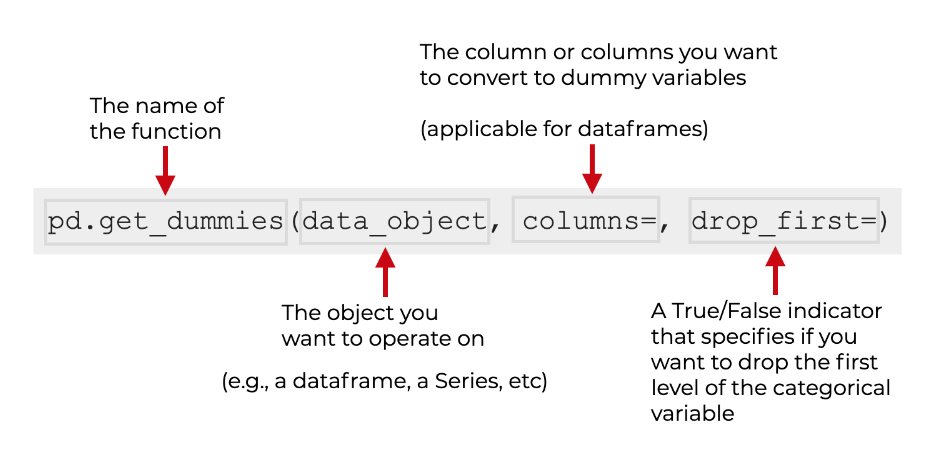

In [198]:
df_train = pd.get_dummies(df_train, columns=['Class'], dtype=float)


In [199]:
new_names = {"Gender": "Płeć", "Customer Type": "Typ klienta", "Age": "Wiek", "Type of Travel": "Typ podróży", "Flight Distance": "Długość lotu", 
             "Departure Delay in Minutes": "Opóźnienie wylotu w minutach", "Arrival Delay in Minutes":"Opóźnienie przylotu w minutach", 
             "satisfaction": "Satysfakcja z lotu"}
df_train = df_train.rename(columns=new_names)

In [200]:
df_train.head()

,Płeć,Typ klienta,Wiek,Typ podróży,Długość lotu,Opóźnienie wylotu w minutach,Opóźnienie przylotu w minutach,Satysfakcja z lotu,Class_Business,Class_Eco,Class_Eco Plus
0,Male,Loyal Customer,13,Personal Travel,460,25,18.0,neutral or dissatisfied,0.0,0.0,1.0
1,Male,disloyal Customer,25,Business travel,235,1,6.0,neutral or dissatisfied,1.0,0.0,0.0
2,Female,Loyal Customer,26,Business travel,1142,0,0.0,satisfied,1.0,0.0,0.0
3,Female,Loyal Customer,25,Business travel,562,11,9.0,neutral or dissatisfied,1.0,0.0,0.0
4,Male,Loyal Customer,61,Business travel,214,0,0.0,satisfied,1.0,0.0,0.0


In [201]:
def convert_gender(gender):
    for gender in df_train['Gender']:
        if gender == "Male":
            return 0
        elif gender == "Female":
            return 1

#df_train["Gender"] = df_train['Gender'].apply(convert_gender)

In [202]:
#df_train["Gender"] = df_train['Gender'].apply(convert_gender)
# Tworzymy słownik mapujący wartości 'Male' na 0 i 'Female' na 1
gender_mapping = {'Male': 0, 'Female': 1}

# Zastępujemy wartości w kolumnie 'Gender' używając mapowania
df_train['Płeć'] = df_train['Płeć'].map(gender_mapping)


In [203]:
# Tworzymy słownik mapujący wartości 'Loyal Customer' na 1 i 'disloyal Customer' na 0
customer_type_mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}

# Zastępujemy wartości w kolumnie 'Customer Typer' używając mapowania
df_train['Typ klienta'] = df_train['Typ klienta'].map(customer_type_mapping)

In [204]:

Type_of_Travel_mapping = {'Personal Travel': 1, 'Business travel': 0}


df_train['Typ podróży'] = df_train['Typ podróży'].map(Type_of_Travel_mapping)

In [205]:
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}


df_train['Satysfakcja z lotu'] = df_train['Satysfakcja z lotu'].map(satisfaction_mapping)

In [206]:
df_train.head()

,Płeć,Typ klienta,Wiek,Typ podróży,Długość lotu,Opóźnienie wylotu w minutach,Opóźnienie przylotu w minutach,Satysfakcja z lotu,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,13,1,460,25,18.0,0,0.0,0.0,1.0
1,0,0,25,0,235,1,6.0,0,1.0,0.0,0.0
2,1,1,26,0,1142,0,0.0,1,1.0,0.0,0.0
3,1,1,25,0,562,11,9.0,0,1.0,0.0,0.0
4,0,1,61,0,214,0,0.0,1,1.0,0.0,0.0


In [207]:
new_names = {"Gender": "Płeć", "Customer Type": "Typ klienta", "Age": "Wiek", "Type of Travel": "Typ podróży", "Flight Distance": "Długość lotu", 
             "Departure Delay in Minutes": "Opóźnienie wylotu w minutach", "Arrival Delay in Minutes":"Opóźnienie przylotu w minutach", 
             "satisfaction": "Satysfakcja z lotu"}
df_train = df_train.rename(columns=new_names)

In [208]:
df_train.head(10)

,Płeć,Typ klienta,Wiek,Typ podróży,Długość lotu,Opóźnienie wylotu w minutach,Opóźnienie przylotu w minutach,Satysfakcja z lotu,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,13,1,460,25,18.0,0,0.0,0.0,1.0
1,0,0,25,0,235,1,6.0,0,1.0,0.0,0.0
2,1,1,26,0,1142,0,0.0,1,1.0,0.0,0.0
3,1,1,25,0,562,11,9.0,0,1.0,0.0,0.0
4,0,1,61,0,214,0,0.0,1,1.0,0.0,0.0
5,1,1,26,1,1180,0,0.0,0,0.0,1.0,0.0
6,0,1,47,1,1276,9,23.0,0,0.0,1.0,0.0
7,1,1,52,0,2035,4,0.0,1,1.0,0.0,0.0
8,1,1,41,0,853,0,0.0,0,1.0,0.0,0.0
9,0,0,20,0,1061,0,0.0,0,0.0,1.0,0.0


In [209]:
df_train.to_csv('train-converted-to-numerical.csv')

In [210]:
df_train["Typ podróży"].value_counts()

Typ podróży
0    71655
1    32249
Name: count, dtype: int64

In [211]:
df_train.dtypes

Płeć                                int64
Typ klienta                         int64
Wiek                                int64
Typ podróży                         int64
Długość lotu                        int64
Opóźnienie wylotu w minutach        int64
Opóźnienie przylotu w minutach    float64
Satysfakcja z lotu                  int64
Class_Business                    float64
Class_Eco                         float64
Class_Eco Plus                    float64
dtype: object

IMPLEMENTACJA DRZEWA NA PODSTAWIE PORADNIKA DATACAMP.COM


https://www.datacamp.com/tutorial/decision-tree-classification-python

In [212]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [213]:
df_train.columns

Index(['Płeć', 'Typ klienta', 'Wiek', 'Typ podróży', 'Długość lotu',
       'Opóźnienie wylotu w minutach', 'Opóźnienie przylotu w minutach',
       'Satysfakcja z lotu', 'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [214]:
#oznaczenie zmiennych zależnych oraz niezależnych
columns = ['Płeć', 'Typ klienta', 'Wiek', 'Typ podróży', 'Długość lotu', 'Opóźnienie wylotu w minutach', 'Opóźnienie przylotu w minutach',
           'Class_Business', 'Class_Eco','Class_Eco Plus' ]
X = df_train[columns]
y = df_train['Satysfakcja z lotu']

In [215]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [216]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [217]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.795232901321699


In [218]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [219]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\jacek\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [220]:
from six import StringIO

In [221]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

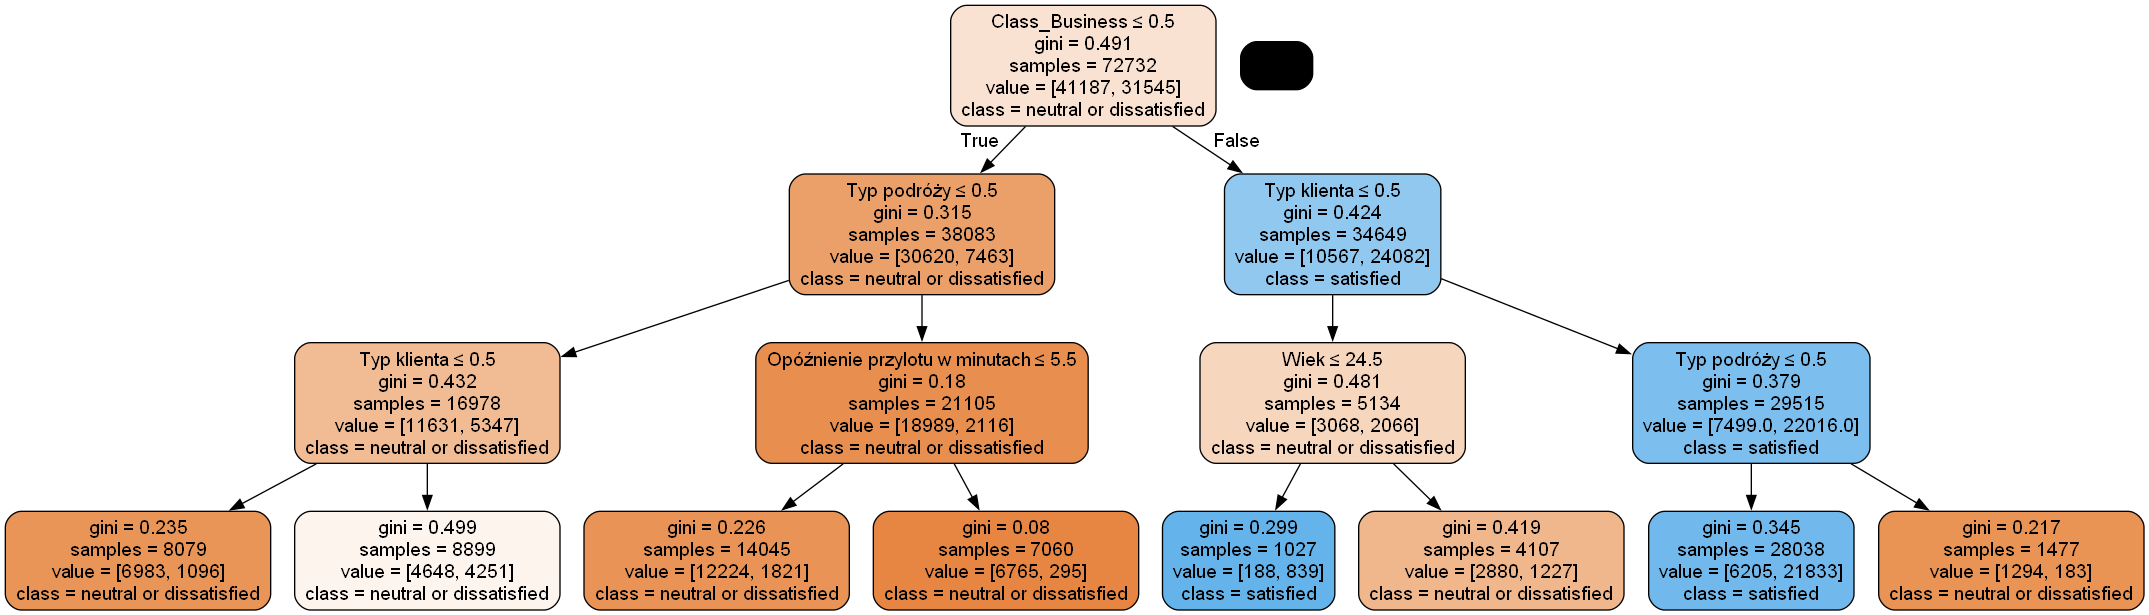

In [222]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = columns,class_names=['neutral or dissatisfied','satisfied'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('satisfaction.png')
Image(graph.create_png())